### TASK A: Top 100 word & Zipf's Law

In [72]:
import pandas as pd

# Load the models and brands mapping
mapping_df = pd.read_csv('car_models_and_brands.csv')

# Load the data from Data Scrapper Code
data_df = pd.read_csv('oldposts_data.csv')

# Create a dictionary for mapping models to brands
model_to_brand = {}
for _, row in mapping_df.iterrows():
    brand = row['Brand']
    models = row['Model'].split('|')
    for model in models:
        model_to_brand[model] = brand

model_to_brand['330i'] = 'bmw'
model_to_brand['325i'] = 'bmw'
model_to_brand['rx'] = 'lexus'
model_to_brand['ls'] = 'lexus'
model_to_brand['gs'] = 'lexus'
model_to_brand['es'] = 'lexus'
model_to_brand['g35'] = 'infiniti'

del model_to_brand['mercedes']

model_to_brand['volkswagen'] = model_to_brand.pop('volkwagen')

brand_fil = list(set(model_to_brand.values()))

# model_to_brand['s4'] = 'audi'
# model_to_brand['tlx'] = 'acura'
# model_to_brand['daytona'] = 'dodge'
# model_to_brand['wrangler'] = 'jeep'

In [74]:
rem_brand = ["car","seat","sedan","problem"]

brand_fil = [word for word in brand_fil if word not in rem_brand]
print(brand_fil)
data_df

['chrysler', 'dodge', 'chevrolet', 'volkwagen', 'toyata', 'saturn', 'lexus', 'mercedes', 'acura', 'nissan.', 'hyndai kia', 'kia', 'pontiac', 'hyundai,', 'toyota', 'hyundai', 'mazda', 'audi', 'cadillac', 'nissan', 'volkswagen', 'kia.', 'hyundai.', 'lincoln', 'buick', 'infiniti', 'bmw', 'honda', 'mercury', 'ford', 'mitsubishi', 'subaru', 'volvo', 'suzuki']


,Unnamed: 0,User_ID,Date,Comment
0,0,merc1,Mar-02,I personally think that with a few tweaks the ...
1,1,fredvh,Mar-02,I am debating a new purchase and these two are...
2,2,blueguydotcom,Mar-02,"Great handling, RWD, excellent engine and the ..."
3,3,hungrywhale,Mar-02,And no manual tranny. That may not matter to y...
4,4,riez,Mar-02,One beauty of BMW 3 Series is that there are s...
...,...,...,...,...
5980,5980,brightness04,Oct-06,"When I bought in 1988, fixed mortgage rates we..."
5981,5981,qbrozen,Oct-06,You won't get an argument from me.\n\nI'd neve...
5982,5982,qbrozen,Oct-06,"As Rocky point out, this is about SEDANS. Last..."
5983,5983,rockylee,Oct-06,"Rocky, I don't know how you get these ridiculo..."


In [75]:
data_df = data_df.drop(columns='Unnamed: 0')

In [76]:
data_df.head()

,User_ID,Date,Comment
0,merc1,Mar-02,I personally think that with a few tweaks the ...
1,fredvh,Mar-02,I am debating a new purchase and these two are...
2,blueguydotcom,Mar-02,"Great handling, RWD, excellent engine and the ..."
3,hungrywhale,Mar-02,And no manual tranny. That may not matter to y...
4,riez,Mar-02,One beauty of BMW 3 Series is that there are s...


In [77]:
import matplotlib.pyplot as plt
import numpy as np
import re

# Extract the comment column
comments = data_df[data_df['Comment'].apply(lambda x: isinstance(x, str))]['Comment']

# Tokenize and preprocess the comments (remove punctuation and convert to lowercase)
def preprocesstext(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = re.findall(r'\b\w+\b', text.lower())  # Tokenize and convert to lowercase
    return list(set(words))

# Tokenize and preprocess the comments
all_words = []
for comment in comments:
    words = preprocesstext(comment)
    all_words.extend(words)

# Calculate word frequencies
word_frequencies = pd.Series(all_words).value_counts()

In [78]:
print(word_frequencies)

the             5160
a               4385
and             4155
to              4127
i               3961
                ... 
cassettes          1
rollers            1
rumblings          1
banglization       1
unpractical        1
Length: 22936, dtype: int64


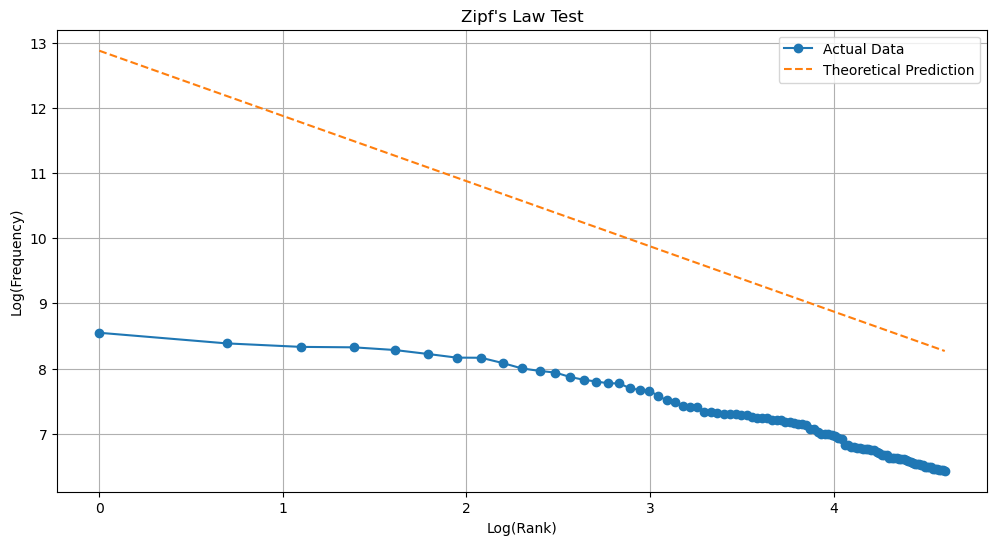

In [79]:
# Calculate word frequencies
word_frequencies = pd.Series(all_words).value_counts()

# Rank words by frequency
ranks = np.arange(1, len(word_frequencies) + 1)

# Calculate the theoretical prediction for Zipf's Law
total_words = len(all_words)
theoretical_freq = total_words / ranks

# Plot the most common 100 words and the theoretical prediction
top_100_words = word_frequencies.head(100)
top_100_ranks = np.arange(1, 101)  # Adjust the ranks to match the top 100 words
plt.figure(figsize=(12, 6))
plt.plot(np.log(top_100_ranks), np.log(top_100_words.values), marker='o', label='Actual Data')
plt.plot(np.log(ranks[:100]), np.log(theoretical_freq[:100]), linestyle='--', label='Theoretical Prediction')
plt.title("Zipf's Law Test")
plt.xlabel("Log(Rank)")
plt.ylabel("Log(Frequency)")
plt.legend()
plt.grid(True)
plt.show()

### TASK B: Word frequency table after removing stop words

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords (you only need to do this once)
nltk.download('stopwords')

# Extract the comment column
comments = data_df[data_df['Comment'].apply(lambda x: isinstance(x, str))]['Comment']

# Get the NLTK English stop words
stop_words = set(stopwords.words('english'))

# Tokenize and preprocess the comments (remove punctuation, convert to lowercase, and remove stop words)
def preprocesstext(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = re.findall(r'\b\w+\b', text.lower())  # Tokenize and convert to lowercase
    nswords = [word for word in words if word not in stop_words]
    nswords = [model_to_brand.get(word, word) for word in nswords]
    return list(set(nswords))

# Tokenize and preprocess the comments, removing stop words
words_nostop = []
for comment in comments:
    words = preprocesstext(comment)
    words_nostop.extend(words)

# Calculate word frequencies
words_nostop_freq = pd.Series(words_nostop).value_counts()

wnf_df = pd.DataFrame(words_nostop_freq)
wnf_df = wnf_df.reset_index()
wnf_df = wnf_df.rename(columns={'index': 'words', 0: 'frequency'})

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/milindbhatia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/var/folders/2q/jjvry_s10q578x_6qd2kc8j00000gn/T/ipykernel_60261/2062774763.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_bd_df['words'] = top_bd_df['words'].replace(key_b)


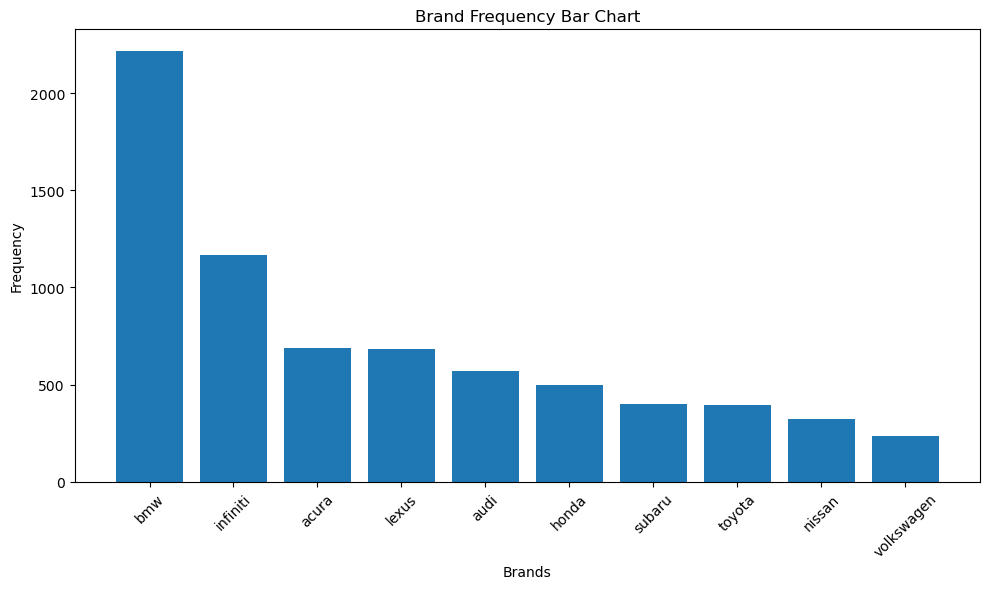

In [81]:
top_bd_df = wnf_df[wnf_df['words'].isin(brand_fil)]
key_b = {"volkwagen":"volkswagen", "mercedes-benz":"mercedes"}
top_bd_df['words'] = top_bd_df['words'].replace(key_b)
top_bd_df_f = top_bd_df.groupby("words").sum().reset_index().sort_values(by='frequency',ascending=False)


plt.figure(figsize=(10, 6))
plt.bar(top_bd_df_f['words'].head(10), top_bd_df_f['frequency'].head(10))
plt.xlabel('Brands')
plt.ylabel('Frequency')
plt.title('Brand Frequency Bar Chart')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

In [84]:
top_10_df = top_bd_df_f.head(10)
top_10_df

,words,frequency
2,bmw,2217
12,infiniti,1167
0,acura,688
14,lexus,685
1,audi,568
9,honda,496
23,subaru,403
25,toyota,397
20,nissan,322
26,volkswagen,238


### TASK C: LIFT Analysis

In [85]:
token_df = pd.DataFrame(comments)
token_df['Tokenized_Message'] = token_df['Comment'].map(preprocesstext)

def replace_words_in_list(word_list, replacements):
    ls = [replacements.get(word, word) for word in word_list]
    return list(set(ls))

token_df['Mapped_words'] = token_df['Tokenized_Message'].apply(lambda x: replace_words_in_list(x, model_to_brand))


In [98]:
word_distance = 15

def distance_thresh(words_list, word1, word2, max_distance):
    indices_word1 = [i for i, word in enumerate(words_list) if word == word1]
    indices_word2 = [i for i, word in enumerate(words_list) if word == word2]
    for idx1 in indices_word1:
        for idx2 in indices_word2:
            if abs(idx1 - idx2) <= max_distance:
                return True
    return False

def lift_analysis(data,word_A,word_B,max_distance):
    if (word_A == word_B):
        return '-'
    else:
        N = data.shape[0]
        N_A = sum(1 for review in data if word_A in review)
        N_B = sum(1 for review in data if word_B in review)
        N_A_and_B = sum(1 for review in data if distance_thresh(review, word_A, word_B, max_distance) and word_A in review and word_B in review)
    
        lift = (N * N_A_and_B) / (N_A * N_B)

        return np.round(lift,4)

df_lift = []

for index, brand1 in top_10_df.iterrows():
    for index,brand2 in top_10_df.iterrows():
        df_lift.append(lift_analysis(token_df['Mapped_words'],brand1['words'],brand2['words'],word_distance))


In [99]:
import numpy as np
lift_np = np.reshape(df_lift,(10,10))
lift_df = pd.DataFrame(data= lift_np)
for i in range(10):
    lift_df = lift_df.rename(columns = {i: top_10_df.iloc[i, 0]})
    lift_df = lift_df.rename(index = {i: top_10_df.iloc[i, 0]})
lift_df


,bmw,infiniti,acura,lexus,audi,honda,subaru,toyota,nissan,volkswagen
bmw,-,1.4551,0.2668,0.2168,0.9125,0.5769,0.2546,0.9384,0.5617,1.3099
infiniti,1.4551,-,0.4622,0.292,0.9029,0.6928,0.3309,0.9818,1.322,1.6387
acura,0.2668,0.4622,-,1.562,1.0108,0.2982,0.5396,0.7669,0.7835,0.5147
lexus,0.2168,0.292,1.562,-,1.4921,0.5813,0.1734,1.1664,0.9768,0.2068
audi,0.9125,0.9029,1.0108,1.4921,-,1.2321,0.6537,0.5574,1.3089,2.0575
honda,0.5769,0.6928,0.2982,0.5813,1.2321,-,0.8384,1.9756,3.7474,1.1424
subaru,0.2546,0.3309,0.5396,0.1734,0.6537,0.8384,-,0.3367,0.7841,0.0879
toyota,0.9384,0.9818,0.7669,1.1664,0.5574,1.9756,0.3367,-,2.2941,2.0517
nissan,0.5617,1.322,0.7835,0.9768,1.3089,3.7474,0.7841,2.2941,-,1.9797
volkswagen,1.3099,1.6387,0.5147,0.2068,2.0575,1.1424,0.0879,2.0517,1.9797,-


### Task D: MDS Plot

In [100]:
lift_df = lift_df.replace(to_replace='-',value=1)
lift_df = lift_df.astype(float)
lift_df

,bmw,infiniti,acura,lexus,audi,honda,subaru,toyota,nissan,volkswagen
bmw,1.0000,1.4551,0.2668,0.2168,0.9125,0.5769,0.2546,0.9384,0.5617,1.3099
infiniti,1.4551,1.0000,0.4622,0.2920,0.9029,0.6928,0.3309,0.9818,1.3220,1.6387
acura,0.2668,0.4622,1.0000,1.5620,1.0108,0.2982,0.5396,0.7669,0.7835,0.5147
lexus,0.2168,0.2920,1.5620,1.0000,1.4921,0.5813,0.1734,1.1664,0.9768,0.2068
audi,0.9125,0.9029,1.0108,1.4921,1.0000,1.2321,0.6537,0.5574,1.3089,2.0575
honda,0.5769,0.6928,0.2982,0.5813,1.2321,1.0000,0.8384,1.9756,3.7474,1.1424
subaru,0.2546,0.3309,0.5396,0.1734,0.6537,0.8384,1.0000,0.3367,0.7841,0.0879
toyota,0.9384,0.9818,0.7669,1.1664,0.5574,1.9756,0.3367,1.0000,2.2941,2.0517
nissan,0.5617,1.3220,0.7835,0.9768,1.3089,3.7474,0.7841,2.2941,1.0000,1.9797
volkswagen,1.3099,1.6387,0.5147,0.2068,2.0575,1.1424,0.0879,2.0517,1.9797,1.0000


In [101]:
from sklearn.manifold import MDS

def invert_value(x):
    if x == 0:
        return np.NaN
    return 1/x

lift_df_inv = lift_df.applymap(invert_value)

lift_df_inv = lift_df_inv.replace(to_replace=np.NaN,value=200)

for i in range(len(lift_df_inv)):
    for j in range(len(lift_df_inv)):
            lift_df_inv.iloc[i, j] = lift_df_inv.iloc[i, j] ** 0.2  ## Scaled values to get better MDS distances


lift_df_inv

,bmw,infiniti,acura,lexus,audi,honda,subaru,toyota,nissan,volkswagen
bmw,1.000000,0.927730,1.302455,1.357651,1.018482,1.116297,1.314705,1.012797,1.122275,0.947441
infiniti,0.927730,1.000000,1.166901,1.279156,1.020639,1.076164,1.247558,1.003680,0.945701,0.905941
acura,1.302455,1.166901,1.000000,0.914669,0.997854,1.273792,1.131320,1.054514,1.050007,1.142061
lexus,1.357651,1.279156,0.914669,1.000000,0.923082,1.114602,1.419679,0.969685,1.004706,1.370534
audi,1.018482,1.020639,0.997854,0.923082,1.000000,0.959115,1.088740,1.124001,0.947586,0.865629
honda,1.116297,1.076164,1.273792,1.114602,0.959115,1.000000,1.035881,0.872690,0.767810,0.973725
subaru,1.314705,1.247558,1.131320,1.419679,1.088740,1.035881,1.000000,1.243230,1.049846,1.626306
toyota,1.012797,1.003680,1.054514,0.969685,1.124001,0.872690,1.243230,1.000000,0.846989,0.866118
nissan,1.122275,0.945701,1.050007,1.004706,0.947586,0.767810,1.049846,0.846989,1.000000,0.872329
volkswagen,0.947441,0.905941,1.142061,1.370534,0.865629,0.973725,1.626306,0.866118,0.872329,1.000000


In [102]:
#perform multi-dimensional scaling
mds = MDS(random_state=0)
scaled_df = mds.fit_transform(lift_df_inv)


/Users/milindbhatia/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
/Users/milindbhatia/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


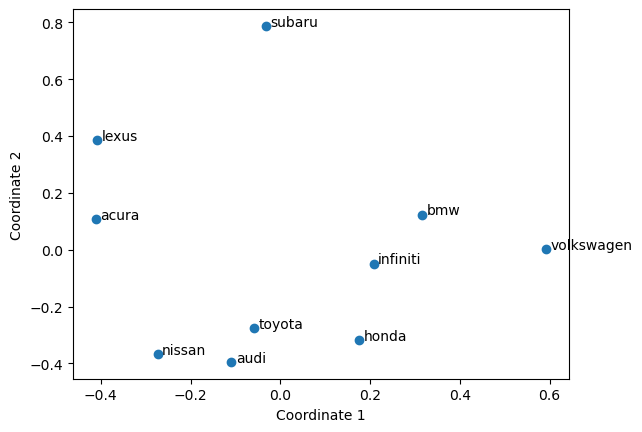

In [103]:
import matplotlib.pyplot as plt

#create scatterplot
plt.scatter(scaled_df[:,0], scaled_df[:,1])

#add axis labels
plt.xlabel('Coordinate 1')
plt.ylabel('Coordinate 2')

#add lables to each point
for i, txt in enumerate(top_10_df['words']):
    plt.annotate(txt, (scaled_df[:,0][i]+.01, scaled_df[:,1][i]))

#display scatterplot
plt.show()

### Task F: Attributes

sport
luxury
hybrid
speed
performance
engine
premium
cost
power
interior

In [109]:
top_5_attr = ['sport','luxury','hybrid','speed','performance','engine','premium','cost','power','interior']
top_5_attr_df = wnf_df[wnf_df['words'].isin(top_5_attr)]
top_5_attr_df = top_5_attr_df.rename(columns={0: 'frequency'})

top_5_attr_df

,words,frequency
32,sport,807
33,luxury,798
35,hybrid,787
54,speed,614
83,performance,499
100,engine,451
123,premium,419
156,cost,370
177,power,335
195,interior,315


In [110]:

df_lift_attr = []

for index, brand1 in top_10_df.iterrows():
    for index, attr in top_5_attr_df.iterrows():
        df_lift_attr.append(lift_analysis(token_df['Mapped_words'],brand1['words'],attr['words'],word_distance))

In [111]:
lift_attr_np = np.reshape(df_lift_attr,(10,10))
lift_attr_df = pd.DataFrame(data= lift_attr_np)
for i in range(10):
    lift_attr_df = lift_attr_df.rename(columns = {i: top_10_df.iloc[i, 0]})
    lift_attr_df = lift_attr_df.rename(index = {i: top_5_attr_df.iloc[i, 0]})
lift_attr_df

,bmw,audi,acura,cooper,honda,volkswagen,dodge,jeep,subaru,toyota
sport,0.0993,0.0080,0.0285,1.0962,0.1028,0.0142,0.0459,0.0087,0.2966,0.0000
luxury,0.0000,0.0099,0.0151,0.1227,0.0318,0.0088,0.6058,0.0214,1.5271,0.0252
hybrid,0.0000,0.5063,0.5955,0.0066,0.0486,0.0179,0.7039,0.0218,0.2291,0.1924
speed,0.4898,0.0377,0.0000,0.7067,0.3013,0.0476,0.4922,0.0813,0.5002,0.0000
performance,0.0113,0.0286,0.2611,0.2826,0.0915,0.0000,0.2507,0.0000,1.1586,0.0435
engine,0.3039,0.0000,0.0000,0.0888,0.3459,0.1410,0.8672,0.1964,0.3525,0.0000
premium,0.1651,0.2385,0.0846,0.0000,0.5720,0.7384,0.0000,1.0286,0.0000,0.1208
cost,4.5580,0.0239,0.0363,0.0000,0.8212,0.5916,0.0000,0.5408,0.0000,0.0000
power,0.0133,0.3240,0.1232,0.0000,0.0216,0.2150,0.1028,0.1747,0.0000,0.1710
interior,0.2870,0.2902,0.2943,0.0000,0.5083,0.8802,0.0000,1.4604,0.0000,0.1050


In [111]:
top_5_attr = ['sport','luxury','hybrid','speed','performance','engine','premium','cost','power','interior']
#Updated after change in data structure - USE THIS - >> performance, luxury, price, engine, handling, interior, power, sport, hp, awd, rwd, fwd, speed, torque